## Predicting Usage of a Video Game Research Server
## (1) Data Description

Two datasets are used:

- **players.csv** – player demographics and gameplay statistics  
- **sessions.csv** – individual session records  
They are connected by **hashedEmail**, which are anonymized player ID.


In [34]:
library(tidyverse)

players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

glimpse(players)
glimpse(sessions)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

In [35]:
cat("players.csv ->", nrow(players), "rows,", ncol(players), "columns\n")
cat("sessions.csv ->", nrow(sessions), "rows,", ncol(sessions), "columns\n")

players_summary <- players |> 
  summarize(across(where(is.numeric), mean, na.rm = TRUE)) |> 
  round(2)

sessions_summary <- sessions |> 
  summarize(across(where(is.numeric), mean, na.rm = TRUE)) |> 
  round(2)

players_summary
sessions_summary


players.csv -> 196 rows, 7 columns
sessions.csv -> 1535 rows, 5 columns


played_hours,Age
<dbl>,<dbl>
5.85,21.14


original_start_time,original_end_time
<dbl>,<dbl>
1.719201e+12,1.719196e+12


### Dataset Information
- `players.csv`: There are 196 observations and 7 variables  
- `sessions.csv`: There are 1,535 observations and 5 variables  

---

### players.csv

| Variable | Type | Description |
|-----------|------|-------------|
| `experience` | categorical | Player experience level (e.g., Amateur, Regular, Pro, Veteran). |
| `subscribe` | logical | Whether the player has an active subscription (TRUE/FALSE). |
| `hashedEmail` | ID | Unique encrypted player identifier. |
| `played_hours` | numeric | Total lifetime hours played. |
| `name` | string | Player display name. |
| `gender` | categorical | Gender label. |
| `Age` | numeric | Player age in years. |

---

### sessions.csv

| Variable | Type | Description |
|-----------|------|-------------|
| `hashedEmail` | ID | Links each session to the corresponding player. |
| `start_time` | datetime (string) | Local time when the session began (`DD/MM/YYYY HH:MM`). |
| `end_time` | datetime (string) | Local time when the session ended. |
| `original_start_time` | numeric | Start timestamp measured in numeric format. |
| `original_end_time` | numeric | End timestamp measured in numeric format. |

---

### Quantitative Summaries  
*(computed with `summarize(across(where(is.numeric), mean, na.rm = TRUE))`)*  

| Dataset | Variable | Mean |
|----------|-----------|------|
| players.csv | `played_hours` | 5.85 hours |
| players.csv | `Age` | 21.14 years |
| sessions.csv | `original_start_time` | 1.72 × 10¹² ms |
| sessions.csv | `original_end_time` | 1.72 × 10¹² ms |

---

### Data Collection and Quality
- The data were collected automatically from the game system and player accounts.  
- Time information is saved in both normal date format and as numbers.  
- Some values are missing in `Age`. 
- A few players have very large `played_hours` values (over 200 hours).  
- Some text variables like `gender` and `experience` are written in different ways and may need cleaning.

### players.csv
- **Observations:** 196  **Variables:** 7  
- **Quantitative summaries:**  
  - `played_hours`: mean = 5.85 h  
  - `Age`: mean = 21.14 yrs  
- Issues: outliers in `played_hours`, two missing ages, inconsistent gender labels.

### sessions.csv
- **Observations:** 1 535  **Variables:** 5  
- **Quantitative summaries:**  
  - `original_start_time`: 1.72 × 10¹²  
  - `original_end_time`: 1.72 × 10¹²  
- Issues: 2 missing end times, non-standard datetime format, time-zone ambiguity.

**Collection notes:** Data recorded automatically by game telemetry and self-reported statistics may be inaccurate.


## (2) Questions

### Broad Question
Which kinds of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts?

### Specific Question
How do player experience level and subscription status relate to the total number of sessions each player contributes?

### Response and Explanatory Variables
- **Response variable:** total number of sessions per player (quantitative)
- **Explanatory variables:** experience level (categorical) and subscription status (categorical)

### How the Data Will Help
The `sessions.csv` dataset records all game sessions for each player, while `players.csv` includes each player's experience level and subscription status.  
We can combine the two datasets using the shared variable `hashedEmail`, so we can calculate the number of sessions each player has contributed and then compare these totals across experience and subscription groups.

### Planned Data Wrangling
To prepare the data for analysis:
1. **Join** `players.csv` and `sessions.csv` by `hashedEmail`.  
2. **Summarize** the number of sessions for each player using `n()`.  
3. **Select** relevant variables (`experience`, `subscribe`, and `total_sessions`).  
4. **Handle** any missing or inconsistent values.

In [36]:
library(tidyverse)

players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

player_sessions <- sessions |>
  group_by(hashedEmail) |>
  summarize(total_sessions = n()) |>
  left_join(players, by = "hashedEmail") |>
  select(experience, subscribe, total_sessions)

head(player_sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,total_sessions
<chr>,<lgl>,<int>
Regular,TRUE,2
Pro,FALSE,1
Beginner,TRUE,1
Regular,TRUE,13
Pro,TRUE,2
Veteran,FALSE,1


In [37]:
players_means <- players |>
  summarize(across(where(is.numeric), mean, na.rm = TRUE)) |>
  round(2)

players_means


played_hours,Age
<dbl>,<dbl>
5.85,21.14


### Quantitative Summary (players.csv)

| Variable | Mean |
|-----------|------|
| played_hours | 5.85 hours |
| Age | 21.14 years |

The average player is about 21 years old and has played roughly 6 hours in total. 
This shows that the dataset includes both short-term and long-term players, since total playtime ranges widely.


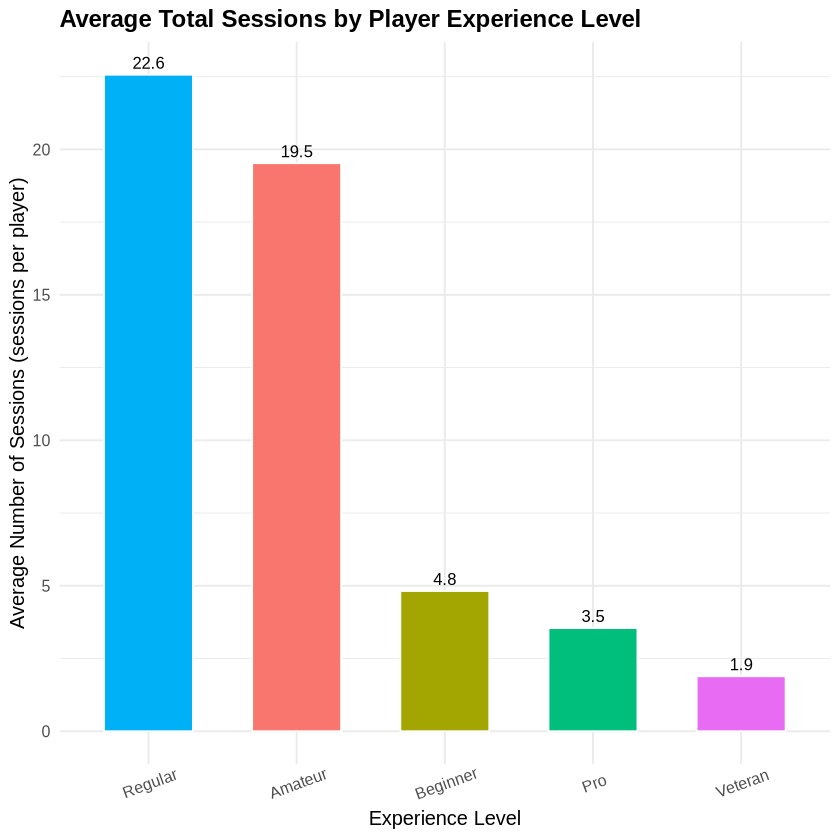

In [38]:
player_sessions |>
  group_by(experience) |>
  summarize(mean_sessions = mean(total_sessions, na.rm = TRUE)) |>
  ggplot(aes(x = reorder(experience, -mean_sessions),  
             y = mean_sessions,
             fill = experience)) +
  geom_col(width = 0.6, color = "white") +
  geom_text(aes(label = round(mean_sessions, 1)),
            vjust = -0.5, size = 3.5) +
  labs(
    title = "Average Total Sessions by Player Experience Level",
    x = "Experience Level",
    y = "Average Number of Sessions (sessions per player)",
    fill = "Experience Level"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "none",
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 10, color = "gray30"),
    axis.text.x = element_text(angle = 20, vjust = 0.8)
  )




### Plot 1 – Average Total Sessions by Player Experience Level
- This bar chart shows the **average number of sessions** played by each experience group.
- The **Regular** and **Veteran** of Players with higher experience levels and they have more total sessions on average.
- This suggests that players who have been active longer or play more often tend to contribute a larger amount of gameplay data.

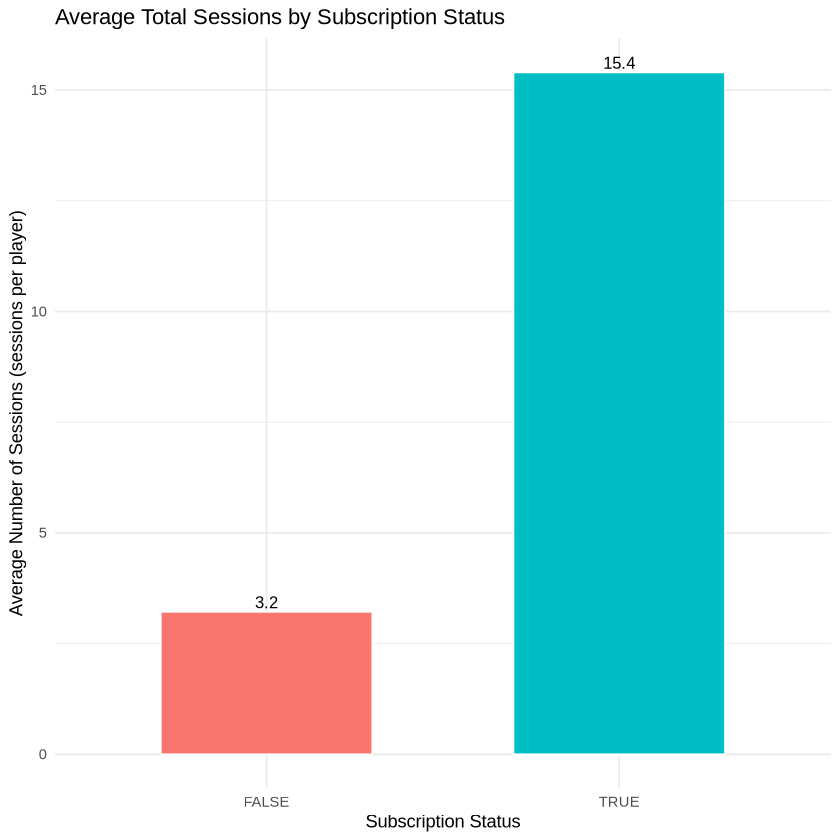

In [39]:
player_sessions |>
  group_by(subscribe) |>
  summarize(mean_sessions = mean(total_sessions, na.rm = TRUE)) |>
  ggplot(aes(x = subscribe, y = mean_sessions, fill = subscribe)) +
  geom_col(width = 0.6, color = "white") +
  geom_text(aes(label = round(mean_sessions, 1)), 
            vjust = -0.3, size = 3.5) +
  labs(
    title = "Average Total Sessions by Subscription Status",
    x = "Subscription Status",
    y = "Average Number of Sessions (sessions per player)"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

### Plot 2 – Average Total Sessions by Subscription Status
- This bar chart compares the average total sessions between **subscribed** and **non-subscribed** players, but my graph shows it as **FALSE** and **TRUE**
- Subscribed players clearly have a higher average number of sessions, which reflects that they are more active and contribute more gameplay data overall.
- This supports the idea that paying or engaged members are more likely to generate a large amount of data for the game.


### Insights Summary

- The data joined together properly using `hashedEmail`form both data set.
- Players with higher experience levels (like Regular or Veteran) usually have more sessions.  
- Subscribed players also play more sessions on average than non-subscribed players.  
- A few players have a very large number of sessions, which could affect the analysis later.  
- Overall, the data looks good for exploring how player traits are related to their activity.


## (4) Methods and Plan

### Planned Method
- I plan to use a **multiple linear regression** model to study the relationship of how player experience level and subscription status between the total number of sessions.
- This method can show how much each variable contributes to predicting the number of sessions a player has and which types of the player are the majority. 

### Why This Method Is Appropriate
- Linear regression works well when we want to understand the relationship between one numeric response variable (`total_sessions`) and several explanatory variables (`experience`, `subscribe`).
- It also provides clear coefficients that are easy to interpret and clearly interpret the the relationships between total session and the experience and subscription. 

### Assumptions
The main assumptions are that the relationship between variables is roughly linear, the data has no strong outliers, and the residuals are normally distributed.

### Limitations
- Some columns have words instead of numbers, like “Amateur” or “Pro.”
- To use these in a model, we need to turn them into numbers (for example, 0 and 1).
- Also, some players have very high session counts, which might make the model less accurate.

### Model Comparison and Selection
I will check model performance using **cross-validation** to make sure the results are stable.  
If I test more than one model, I can compare them using RMSE (Root Mean Squared Error) to see which fits better.

### Data Processing Plan
Before modelling, I will:
1. Join the datasets and create `total_sessions` for each player.  
2. Clean missing data and fix inconsistent labels.  
3. Split the data into **training (80%)** and **testing (20%)** sets before building the model.  
4. Use **5-fold cross-validation** on the training data to tune and evaluate the model.
